In [17]:
import gymnasium as gym
import matplotlib.pyplot as plt
import minihack
from minihack import RewardManager

from utils import *
from AA_algorithms import *
import IPython.display as display



Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                              --------------------                              
                              |$@.........$......|                              
                              |.$...$............|                              
                              |.................$|                              
                           

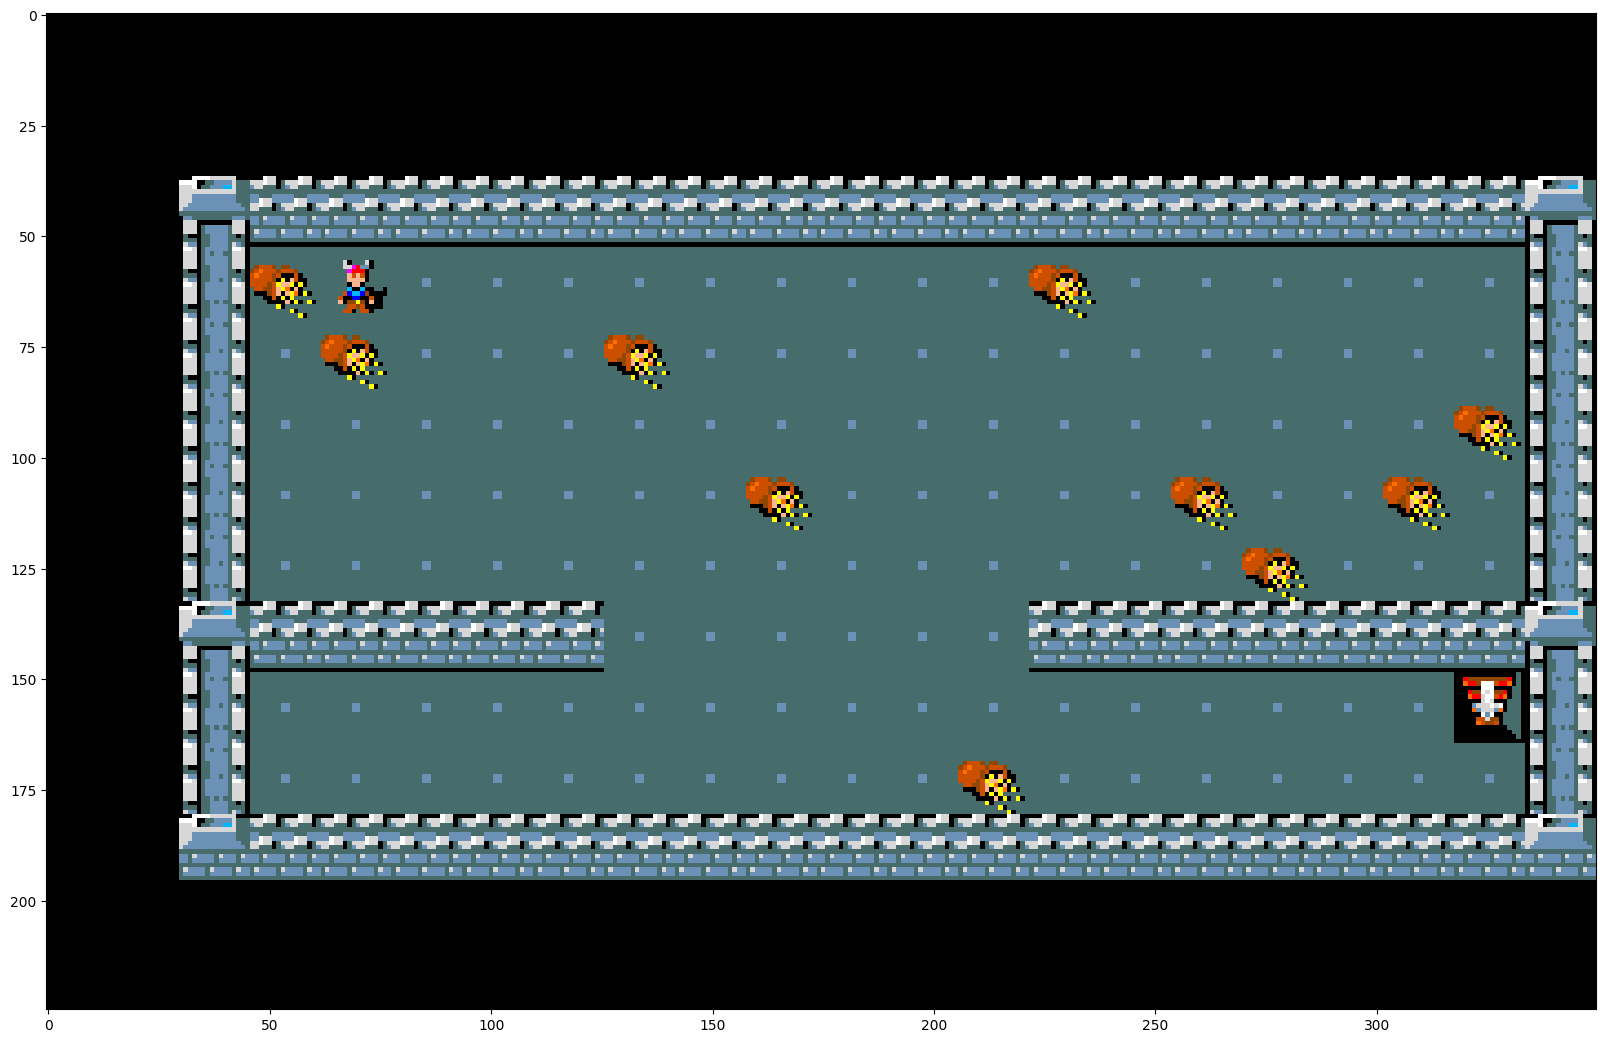

In [18]:

reward = RewardManager()
env1 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("glyphs", "chars", "colors", "pixel"),
    des_file="map1.des",
)
state1, _ = env1.reset()
env1.render()
# plot the map in a bigger size
plt.figure(figsize=(20, 20))
plt.imshow(state1['pixel'][75:300, 450:800])



Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                            ----------------------                              
                            |@$}....$$.}......}.$.|                             
                           

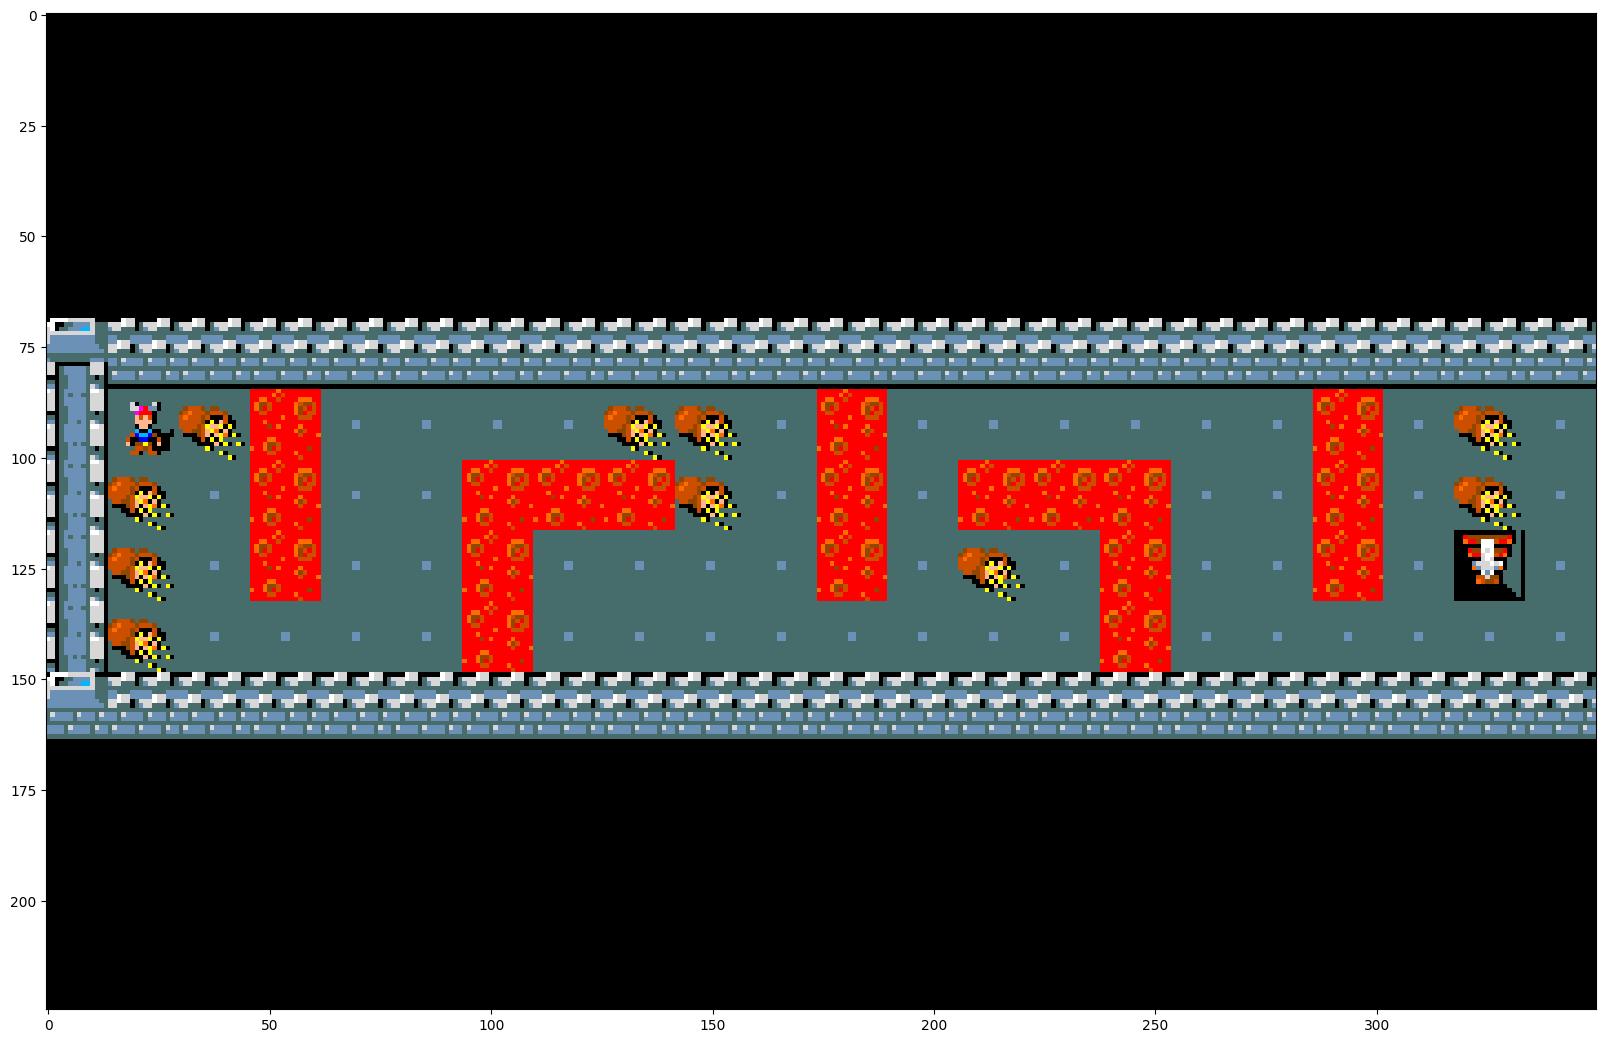

In [19]:
env2 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("glyphs", "chars", "colors", "pixel"),
    des_file="map2_static.des",
)
state2, _ = env2.reset()
env2.render()
# plot the map in a bigger size
plt.figure(figsize=(20, 20))
plt.imshow(state2['pixel'][75:300, 450:800])


$ - a gold piece.                                                               
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                              --------------------                              
                              |$..^...$.......^..|                              
                           

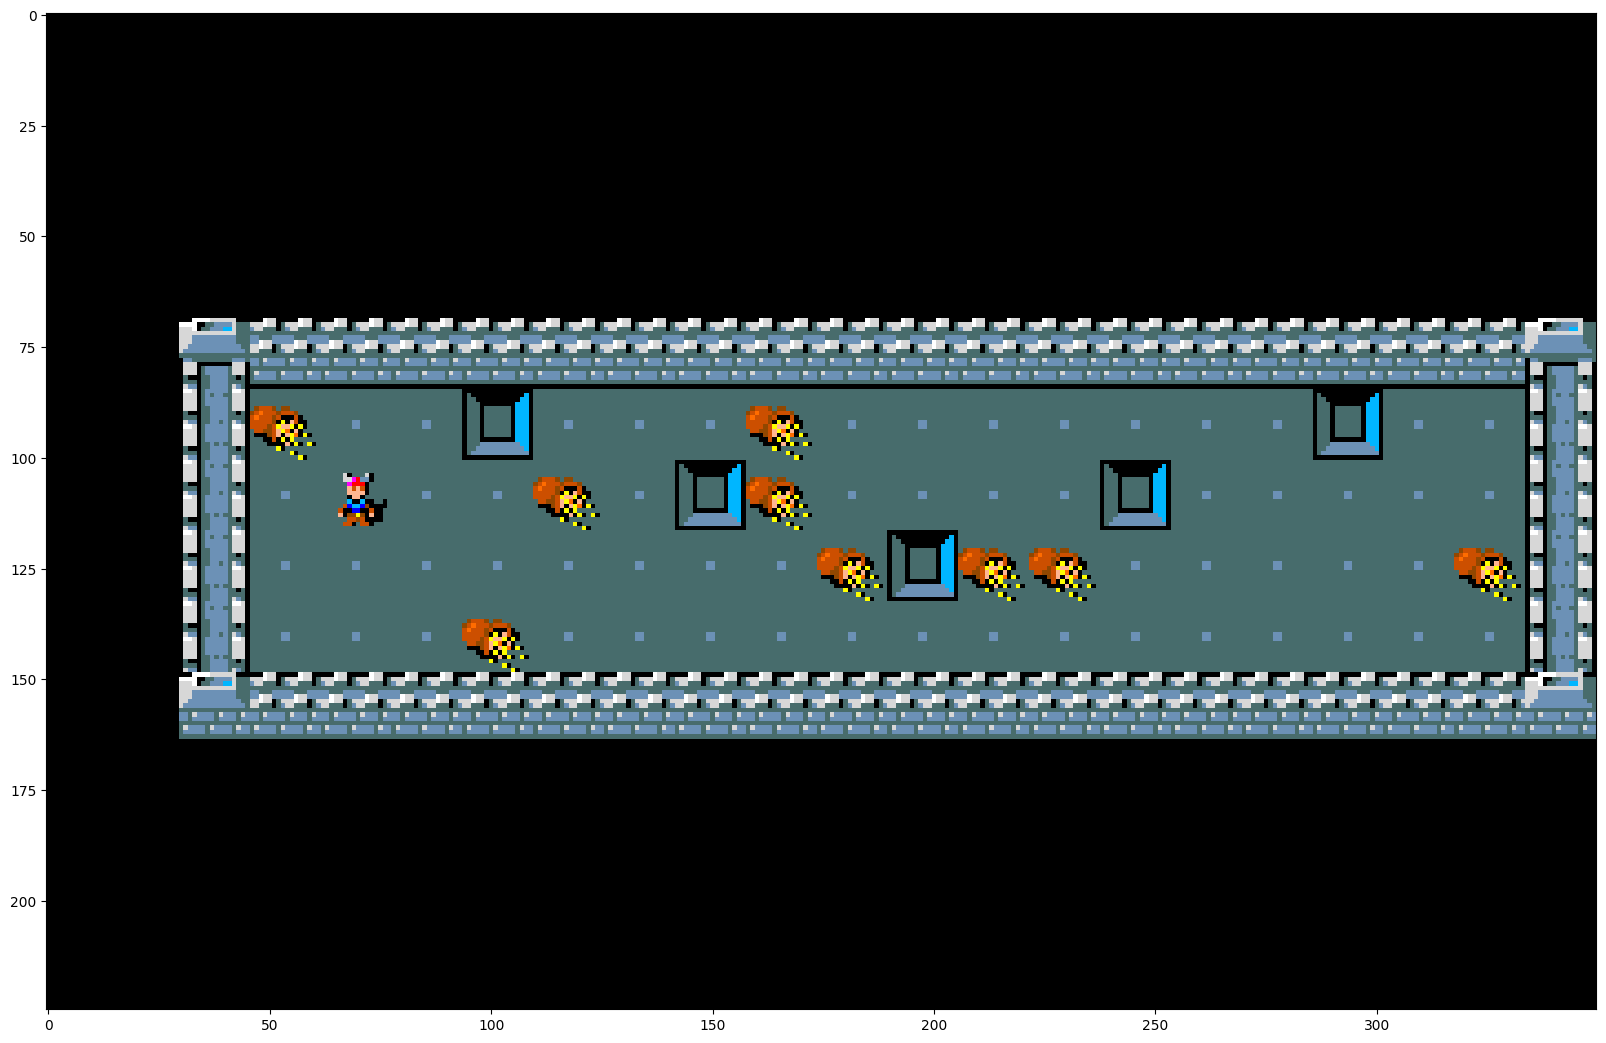

In [20]:
env3 = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("glyphs", "chars", "colors", "pixel"),
    des_file="map3.des",
    reward_manager=reward,
)
state3, _ = env3.reset()
env3.render()
# plot the map in a bigger size
plt.figure(figsize=(20, 20))
plt.imshow(state3['pixel'][75:300, 450:800])

# Testing A* algorithm on a custom map

In [21]:
directions = ["UP", "RIGHT", "DOWN", "LEFT"]

env = env1
state, _ = env.reset()
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

char_map = np.vectorize(chr)(game_map)
gold_positions = np.where(char_map == '$')
# zip into a list of int tuples (x, y)
gold_positions = list(zip(gold_positions[0], gold_positions[1]))
print("Gold positions:", gold_positions)


Gold positions: [(np.int64(8), np.int64(42)), (np.int64(9), np.int64(32)), (np.int64(9), np.int64(36)), (np.int64(10), np.int64(48)), (np.int64(11), np.int64(38)), (np.int64(11), np.int64(44)), (np.int64(11), np.int64(47)), (np.int64(12), np.int64(45)), (np.int64(15), np.int64(41))]



$ - a gold piece.                                                               
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                              --------------------                              
                              |@..........$......|                              
                              |.$...$............|                              
                              |.................$|                              
                           

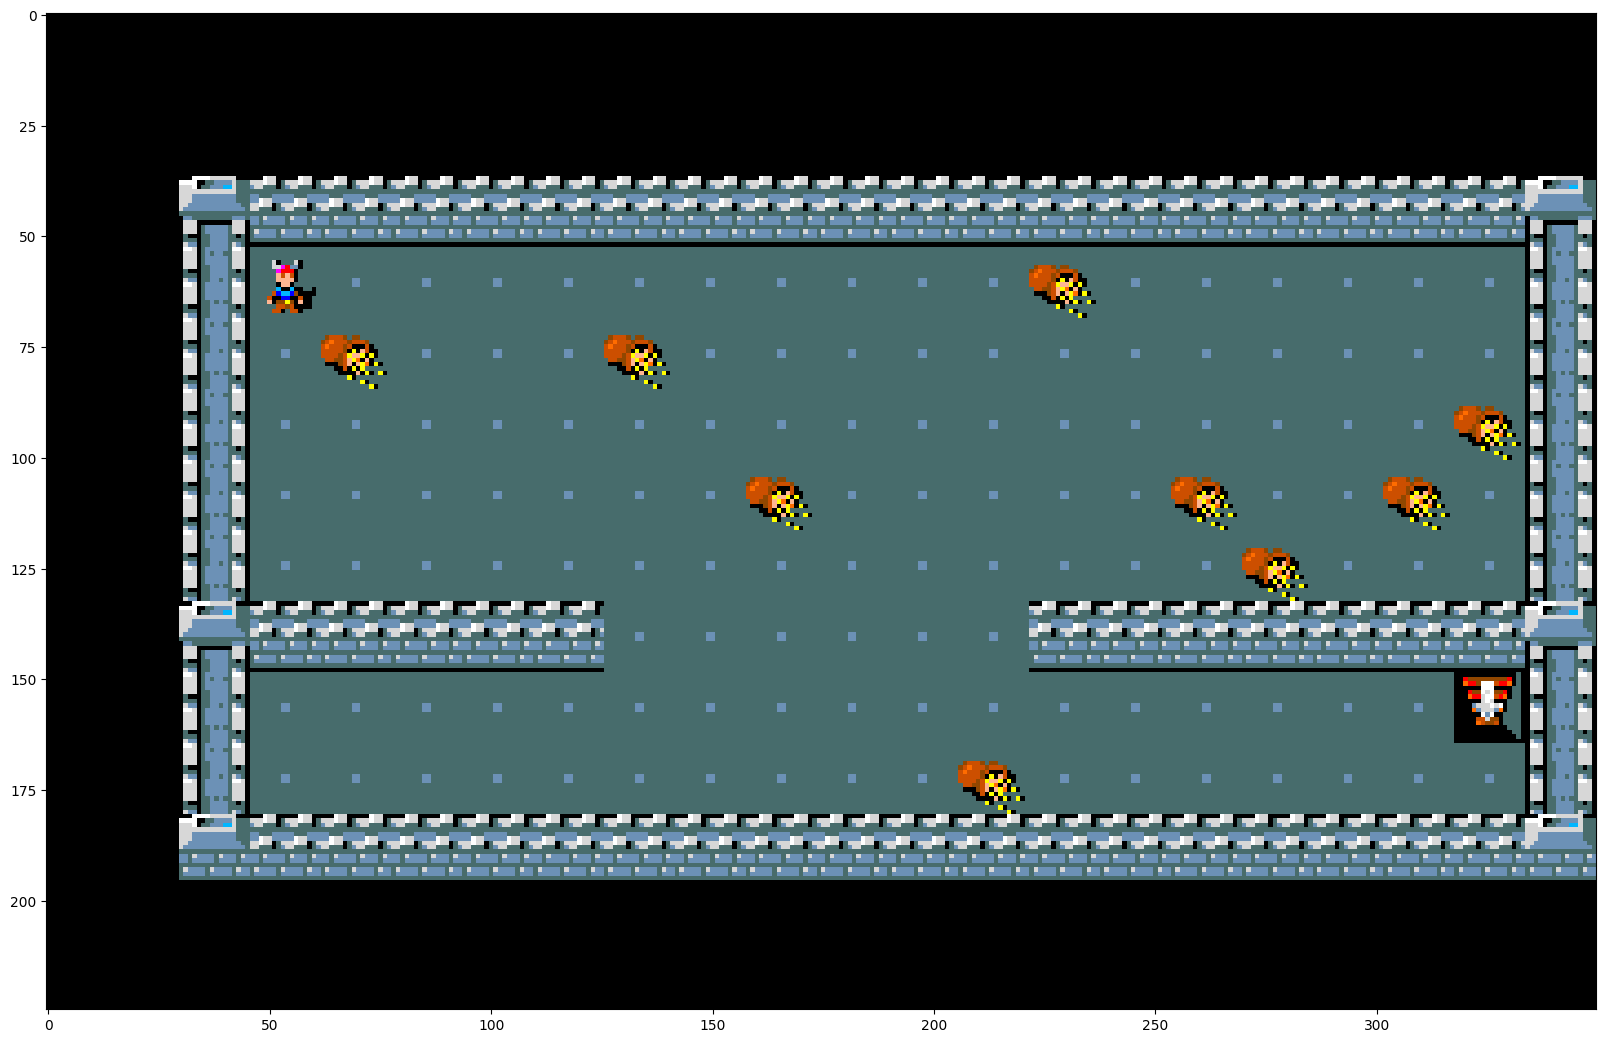

In [22]:
# print the current map
plt.figure(figsize=(20, 20))
plt.imshow(state['pixel'][75:300, 450:800])
env.render()

In [23]:
def print_path_on_map(game_map: np.ndarray, path: List[Tuple[int, int]]):
    path_set = set(path)
    for y in range(game_map.shape[0]):
        row = ""
        for x in range(game_map.shape[1]):
            pos = (y, x)
            char = chr(game_map[y, x])
            if pos == path[0]:
                row += "@"
            elif pos == path[-1]:
                row += ">"
            elif pos in path_set:
                if char == '$':
                    row += "G" # collected gold
                else:
                    row += "*" # part of the path
            else:
                row += char
        print(row)


In [24]:
path = a_star_gold(game_map, start, target, manhattan_distance)
actions = actions_from_path(start, path[1:])
print("Actions to take:", list((map(lambda x: directions[x], actions))))
# check how much gold is collected in the path
gold_collected = 0
for (x, y) in path:
    if chr(game_map[x, y]) == '$':
        gold_collected += 1

print("Gold collected in the path:", gold_collected)
print_path_on_map(game_map, path)


Actions to take: ['RIGHT', 'DOWN', 'RIGHT', 'DOWN', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN', 'RIGHT', 'DOWN', 'RIGHT', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT']
Gold collected in the path: 2
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                              --------------------                             
                              |@*.........$......|                             
                              |

Actions to take: ['RIGHT', 'DOWN', 'RIGHT', 'DOWN', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN', 'RIGHT', 'DOWN', 'RIGHT', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT']
Gold collected in the path: 2
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                              --------------------                             
                              |@*.........$......|                             
                              |

In [40]:
import time

state, _ = env.reset()
game_map = state['chars']
game = state['pixel']
path = a_star_gold(game_map, start, target, manhattan_distance, gold_bonus=2)
actions = actions_from_path(start, path[1:])
print("Actions to take:", list((map(lambda x: directions[x], actions))))
# check how much gold is collected in the path
gold_collected = 0
for (x, y) in path:
    if chr(game_map[x, y]) == '$':
        gold_collected += 1

print("Gold collected in the path:", gold_collected)
print_path_on_map(game_map, path)

Actions to take: ['RIGHT', 'DOWN', 'RIGHT', 'DOWN', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'DOWN', 'RIGHT', 'DOWN', 'RIGHT', 'DOWN', 'DOWN', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT', 'RIGHT']
Gold collected in the path: 3
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                                                                               
                              --------------------                             
                              |@*.........$......|                             
                              |

Action taken: RIGHT


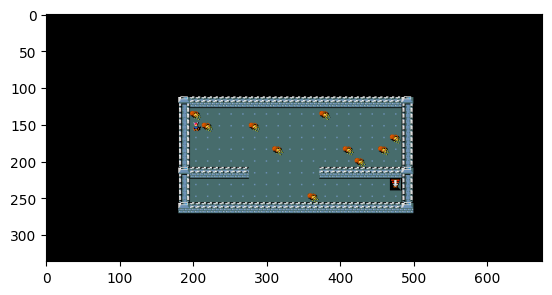

Action taken: DOWN


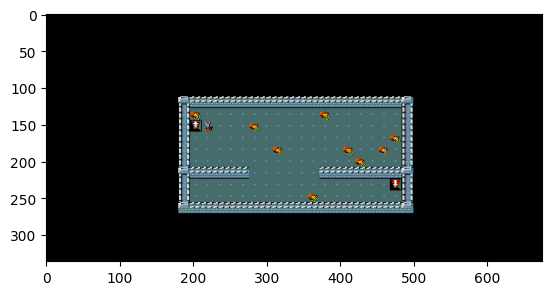

Action taken: RIGHT


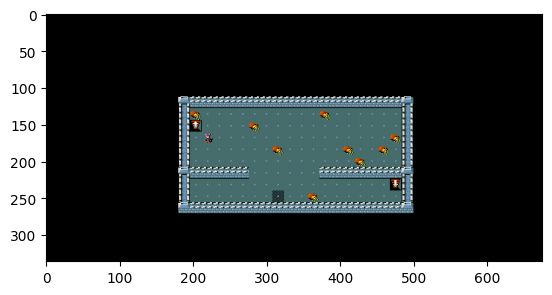

Action taken: DOWN


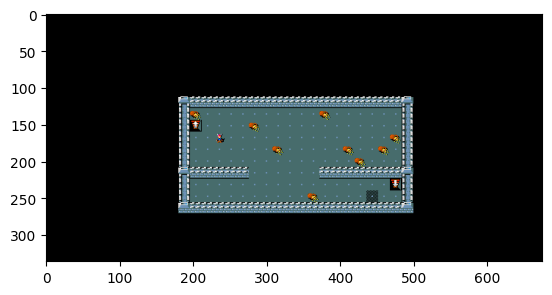

Action taken: RIGHT


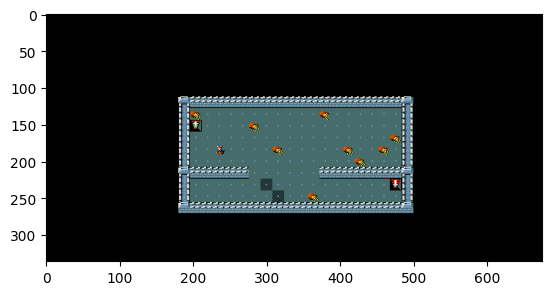

Action taken: RIGHT


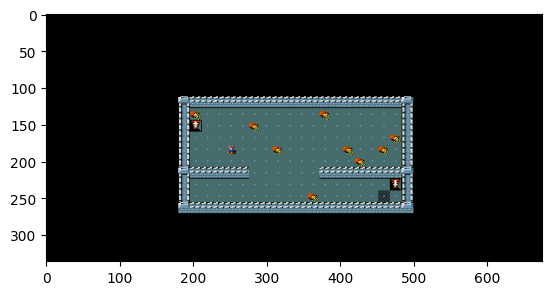

Action taken: RIGHT


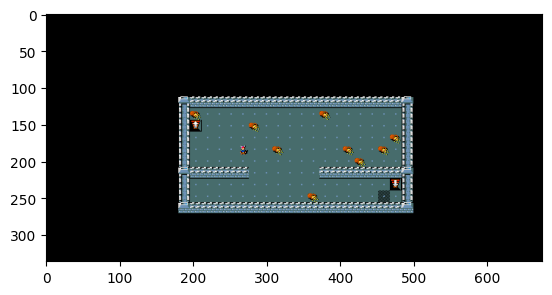

Action taken: RIGHT


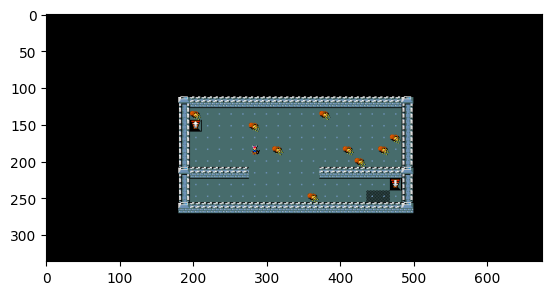

Action taken: RIGHT


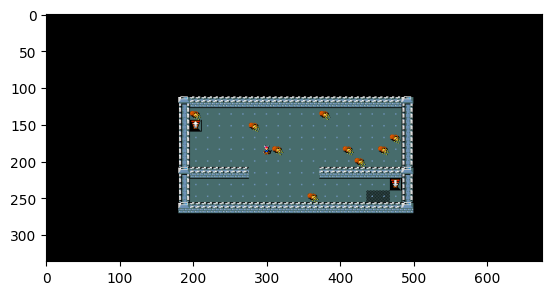

Action taken: DOWN


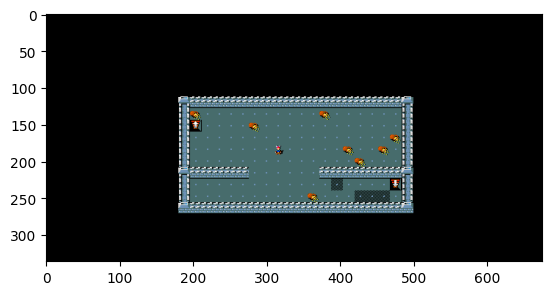

Action taken: RIGHT


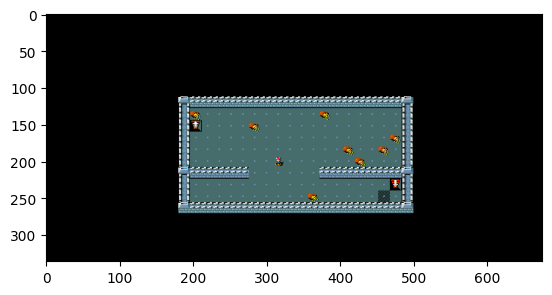

Action taken: DOWN


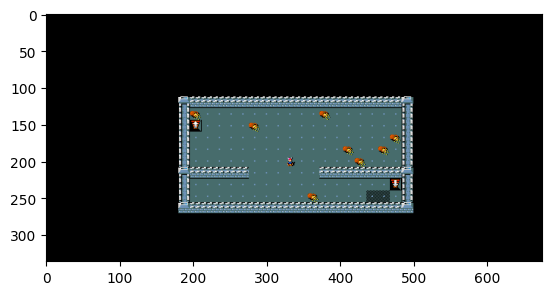

Action taken: RIGHT


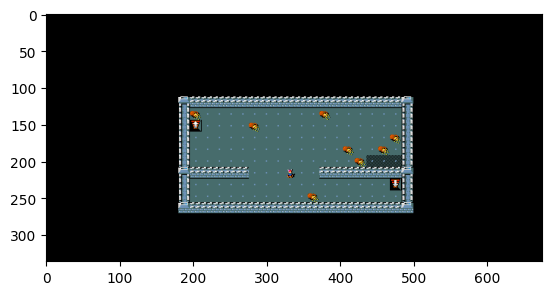

Action taken: DOWN


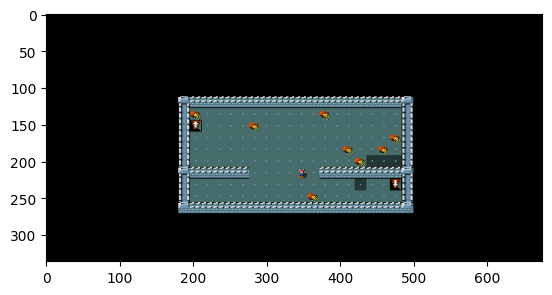

Action taken: DOWN


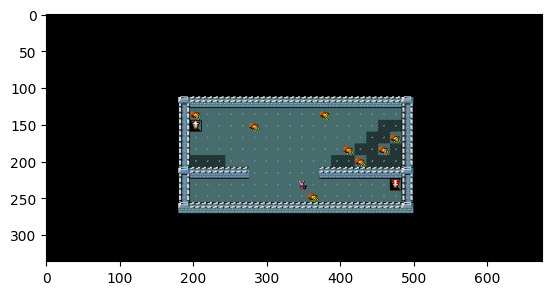

Action taken: RIGHT


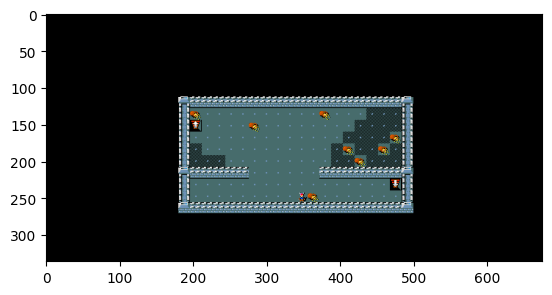

Action taken: RIGHT


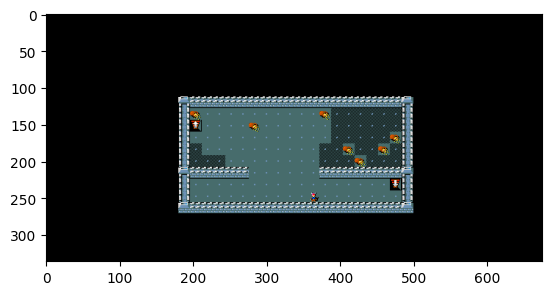

Action taken: RIGHT


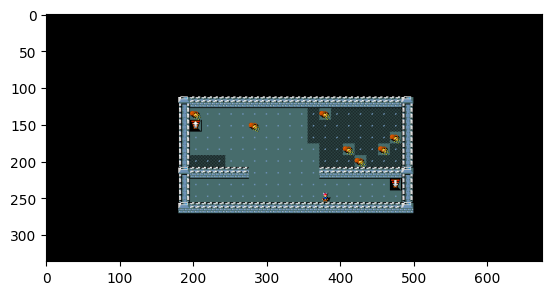

Action taken: RIGHT


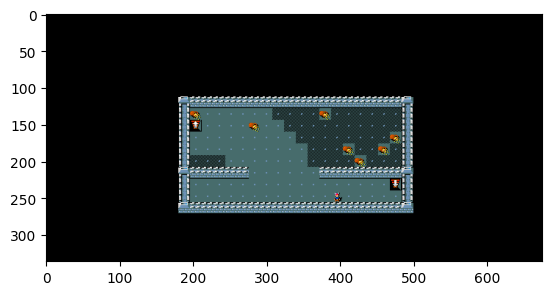

Action taken: RIGHT


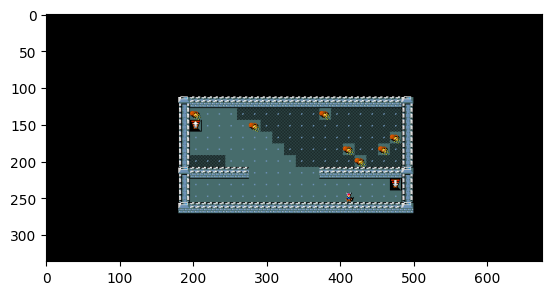

Action taken: RIGHT


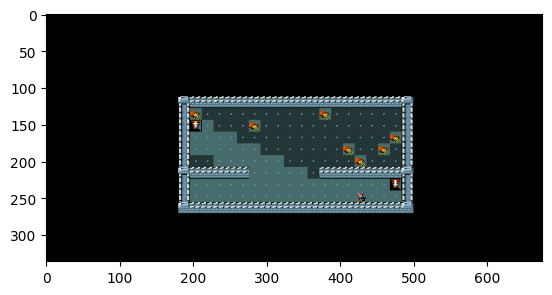

Action taken: RIGHT


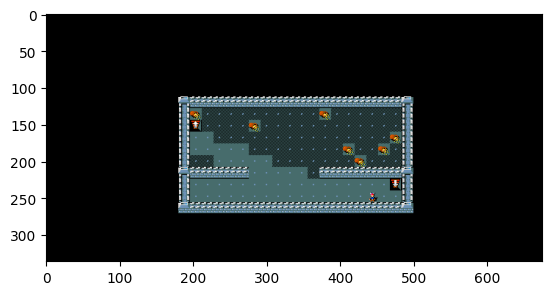

Action taken: RIGHT


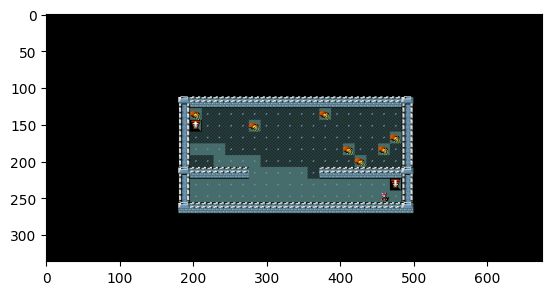

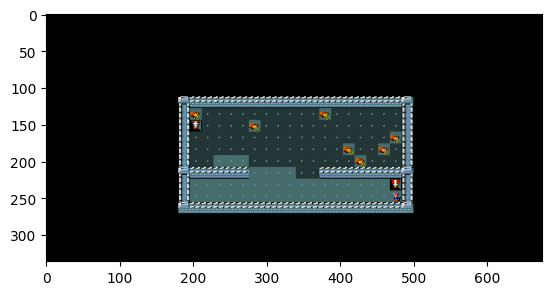

In [41]:
image = plt.imshow(game[:, 300:975])
for action in actions:
    s, _, done, _, dic = env.step(action)
    if not done:
        display.display(plt.gcf())
        #display.clear_output(wait=)
        #time.sleep(0.5)
        image.set_data(s['pixel'][:, 300:975])
        print("Action taken:", directions[action])
    else:
        print(f"Episode finished:", dic)
        break
